In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install -c conda-forge rdkit

In [ ]:
import itertools
import gzip
import pandas as pd
import pandas
import rdkit.Chem
import rdkit.Chem.AllChem
import rdkit.DataStructs

In [ ]:
supplier = rdkit.Chem.SDMolSupplier('drive/MyDrive/structures.sdf')

In [ ]:
molecules = [mol for mol in supplier if mol is not None]
len(molecules)

11160

In [ ]:
from tqdm import tqdm
fingerprints = dict()
for mol in tqdm(molecules):
    drugbank_id = mol.GetProp('DATABASE_ID')
    fingerprint = rdkit.Chem.AllChem.GetMorganFingerprint(mol, 2)
    fingerprints[drugbank_id] = fingerprint

100%|██████████| 11160/11160 [00:00<00:00, 16772.72it/s]


In [ ]:
len(fingerprints)

11160

In [ ]:
interaction_dataset=pd.read_csv('drive/MyDrive/uniprot links.csv')

In [ ]:
interaction_dataset.head(-5)

In [ ]:
interaction_set=list(set(interaction_dataset['DrugBank ID']))

In [ ]:
len(interaction_set)

2170

In [ ]:
inner_join={}
for i in tqdm(range(len(interaction_set))):
  j=interaction_set[i]
  if j in fingerprints.keys():
    inner_join[j]=fingerprints[j]

100%|██████████| 2170/2170 [00:00<00:00, 497901.51it/s]


In [103]:
import csv
w = csv.writer(open("drive/MyDrive/drug_inner_join.csv", "w"))
for key, val in inner_join.items():
    w.writerow([key, val])

In [ ]:
# Calculate pairwise compound similarities
similarity_rows = list()
for (id0, fp0), (id1, fp1) in tqdm(itertools.combinations(inner_join.items(), 2)):
    similarity = rdkit.DataStructs.DiceSimilarity(fp0, fp1)
    similarity = round(similarity, 4)
    similarity_rows.append([id0, id1, similarity])

1695561it [00:10, 166212.31it/s]


In [ ]:
drug_similarity_df_split = pd.DataFrame(similarity_rows, columns=['compound0', 'compound1', 'similarity'])

In [ ]:
drug_similarity_df_split

,compound0,compound1,similarity
0,DB01421,DB00865,0.0242
1,DB01421,DB00301,0.0515
2,DB01421,DB01082,0.4840
3,DB01421,DB09095,0.1383
4,DB01421,DB06694,0.0247
...,...,...,...
1695556,DB00591,DB00515,0.0000
1695557,DB00591,DB00962,0.1457
1695558,DB06414,DB00515,0.0227
1695559,DB06414,DB00962,0.3217


In [ ]:
drug_similarity_df_split.to_csv('drive/MyDrive/drug_similarity_df.csv', index=False)

In [ ]:
indexNames = drug_similarity_df_split[drug_similarity_df_split['similarity'] <0.5 ].index
drug_similarity_df_split.drop(indexNames , inplace=True)
drug_similarity_df_split.head(-5)

,compound0,compound1,similarity
467,DB01421,DB04465,0.6207
525,DB01421,DB00479,0.7000
600,DB01421,DB01172,0.7761
718,DB01421,DB15617,0.5098
720,DB01421,DB00581,0.5287
...,...,...,...
1693063,DB00333,DB11071,0.5091
1693358,DB00279,DB01235,0.5859
1693572,DB01179,DB06174,0.5294
1694164,DB01185,DB00769,0.5570


In [ ]:
l=[]
for i in tqdm(drug_similarity_df_split['similarity']):
  if i<0.5:
    l.append(i)

100%|██████████| 8329/8329 [00:00<00:00, 1255502.53it/s]


In [ ]:
len(l)

0

In [ ]:
drug_similarity_df_split.to_csv('drive/MyDrive/drug_similarity_df_TH.csv', index=False)

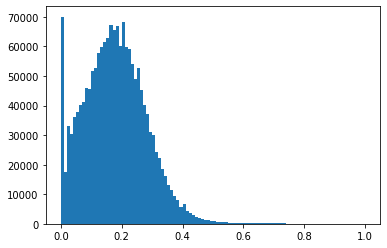

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(drug_similarity_df_split.similarity, 100);